# Diamond Price Prediction 2024

## import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read The Data

In [ ]:
diamond_dataframe = pd.read_csv('/content/drive/MyDrive/Data_For_Analysis/train_diamond.csv')
df = diamond_dataframe.copy()
df.head(4)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19


## Info & Describe to see information about the data, check duplicate, check missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## First insight
## There are no duplicated values and also no missing values

## we will see the values of categorical features

In [ ]:
df['cut'].value_counts()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

In [ ]:
df['color'].value_counts()

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

In [ ]:
df['clarity'].value_counts()

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64

## Then We Will split categorical and numarical Features

## before that we will remove outliers

In [ ]:
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)
df.shape

(43135, 11)

In [ ]:
df_numerical_features = df.select_dtypes(include='number')
df_numerical_features.columns

Index(['Id', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

we will add some features

In [ ]:
# Calculate aspect ratio
df_numerical_features['aspect_ratio'] = df_numerical_features['x'] / df_numerical_features['y']
df_numerical_features['xy_volume'] = df_numerical_features['x'] * df_numerical_features['y'] * df_numerical_features['z']  # volume based on length and width
df_numerical_features

,Id,carat,depth,table,price,x,y,z,aspect_ratio,xy_volume
0,1,1.06,61.8,57.0,4270,6.57,6.60,4.07,0.995455,176.483340
1,2,1.51,60.9,58.0,15164,7.38,7.42,4.51,0.994609,246.965796
2,3,0.32,61.3,56.0,828,4.43,4.41,2.71,1.004535,52.943373
3,4,0.53,61.2,56.0,1577,5.19,5.22,3.19,0.994253,86.422842
4,5,0.70,61.0,57.0,2596,5.76,5.72,3.50,1.006993,115.315200
...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,61.5,56.0,1760,5.16,5.18,3.18,0.996139,84.997584
43148,43149,0.72,62.1,59.0,3016,5.70,5.73,3.55,0.994764,115.946550
43149,43150,0.44,61.5,58.0,990,4.95,4.87,3.02,1.016427,72.801630
43150,43151,0.31,60.2,58.0,734,4.38,4.43,2.65,0.988713,51.419010


## after that we will draw it

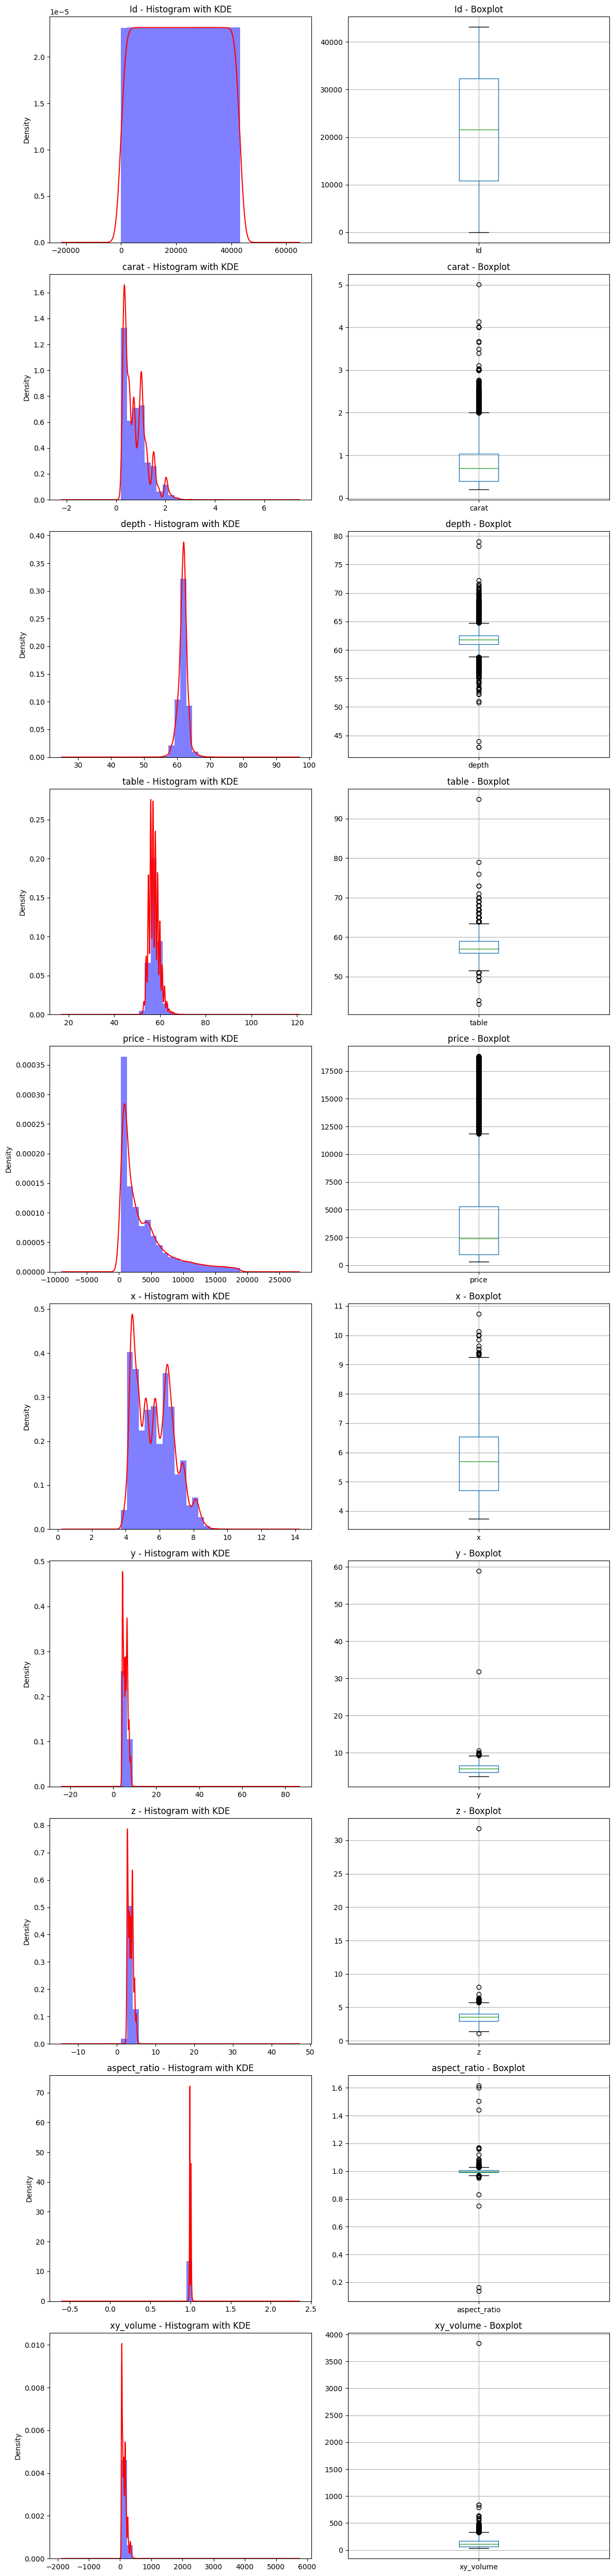

In [ ]:
# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    # Histogram with KDE
    df_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    df_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

## Insights:
## there are outliers in most of columns
## we can drop id column


In [ ]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['cut', 'color', 'clarity'], dtype='object')

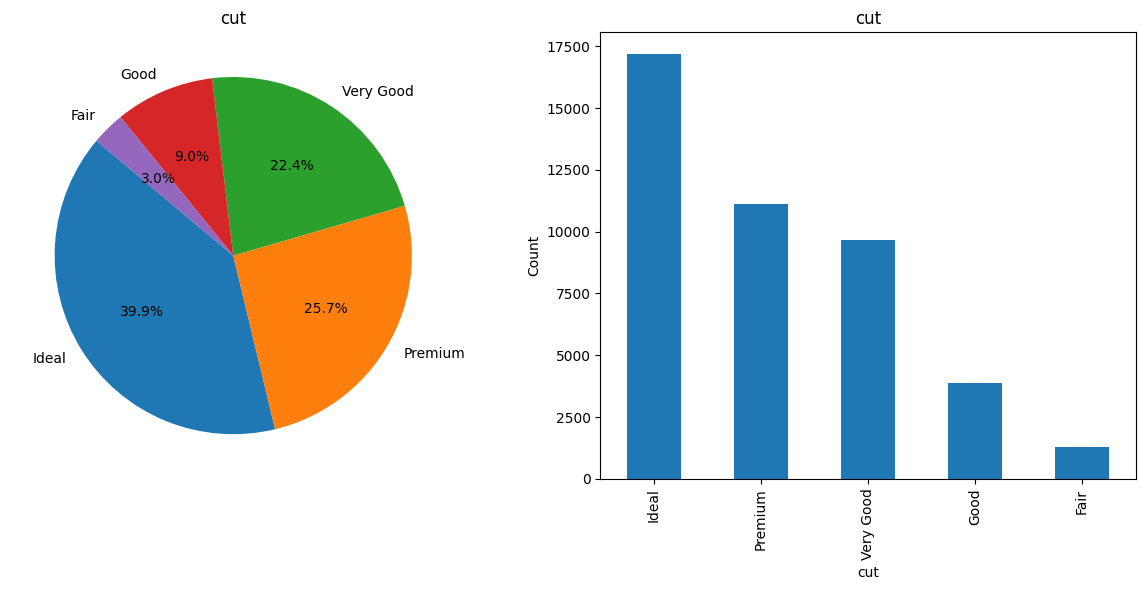

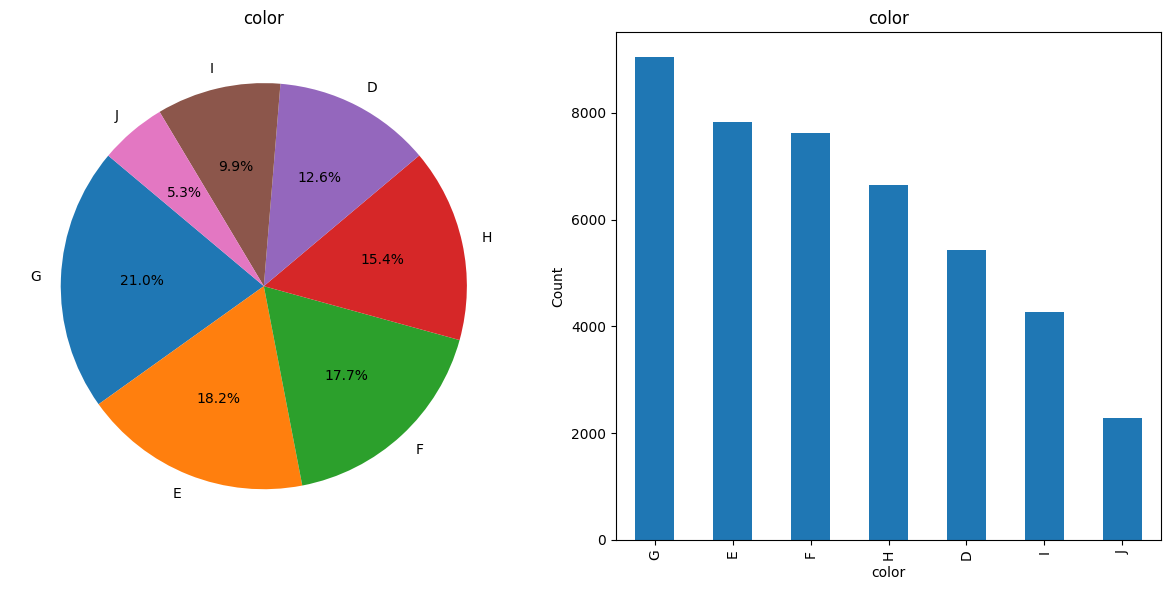

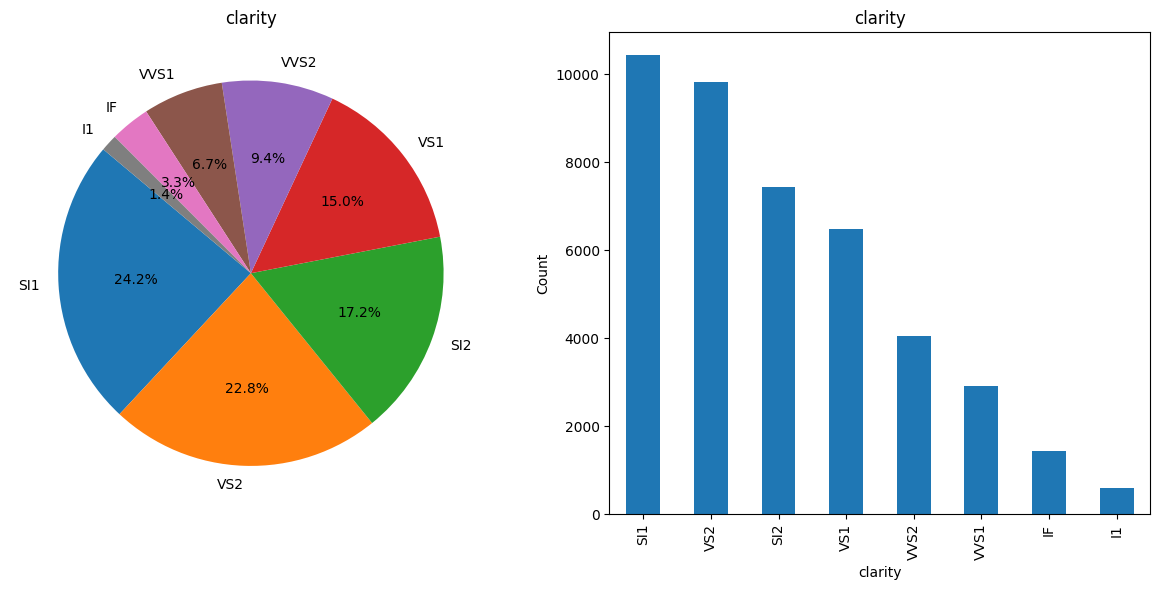

In [ ]:
for i in df_categorical_features.columns:
  counts = df_categorical_features[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

## Dealing with the categorical Data
## Label encoding

In [ ]:
df_categorical_features.head()

,cut,color,clarity
0,Ideal,I,SI2
1,Premium,G,VVS2
2,Ideal,F,VS2
3,Ideal,G,VS2
4,Premium,H,VVS2


In [ ]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns.
for i in range(df_categorical_features.shape[1]):
  df_categorical_features.iloc[:,i] = label_encoder.fit_transform(df_categorical_features.iloc[:,i])

In [ ]:
df_categorical_features.head()

,cut,color,clarity
0,2,5,3
1,3,3,7
2,2,2,5
3,2,3,5
4,3,4,7


before concat we will drop x and y because we use them in another features and also z and table

In [ ]:
df_numerical_features.drop(['x','y','z','table'],axis=1,inplace=True)
df_numerical_features

,Id,carat,depth,price,aspect_ratio,xy_volume
0,1,1.06,61.8,4270,0.995455,176.483340
1,2,1.51,60.9,15164,0.994609,246.965796
2,3,0.32,61.3,828,1.004535,52.943373
3,4,0.53,61.2,1577,0.994253,86.422842
4,5,0.70,61.0,2596,1.006993,115.315200
...,...,...,...,...,...,...
43147,43148,0.52,61.5,1760,0.996139,84.997584
43148,43149,0.72,62.1,3016,0.994764,115.946550
43149,43150,0.44,61.5,990,1.016427,72.801630
43150,43151,0.31,60.2,734,0.988713,51.419010


## concatenating df_numerical_features and df_categorical_features along columns


In [ ]:
# concatenating df_num_features and df_cat_features along columns
df_all_features = pd.concat([df_numerical_features, df_categorical_features], axis=1)
df_all_features.head()

,Id,carat,depth,price,aspect_ratio,xy_volume,cut,color,clarity
0,1,1.06,61.8,4270,0.995455,176.483340,2,5,3
1,2,1.51,60.9,15164,0.994609,246.965796,3,3,7
2,3,0.32,61.3,828,1.004535,52.943373,2,2,5
3,4,0.53,61.2,1577,0.994253,86.422842,2,3,5
4,5,0.70,61.0,2596,1.006993,115.315200,3,4,7


In [ ]:
df_all_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43135 entries, 0 to 43151
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            43135 non-null  int64  
 1   carat         43135 non-null  float64
 2   depth         43135 non-null  float64
 3   price         43135 non-null  int64  
 4   aspect_ratio  43135 non-null  float64
 5   xy_volume     43135 non-null  float64
 6   cut           43135 non-null  object 
 7   color         43135 non-null  object 
 8   clarity       43135 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 4.3+ MB


##<font color='yellow'>**After That We Will Compute The Correlation Between Numeric Features And Plot The Heatmap Between Them**</font>

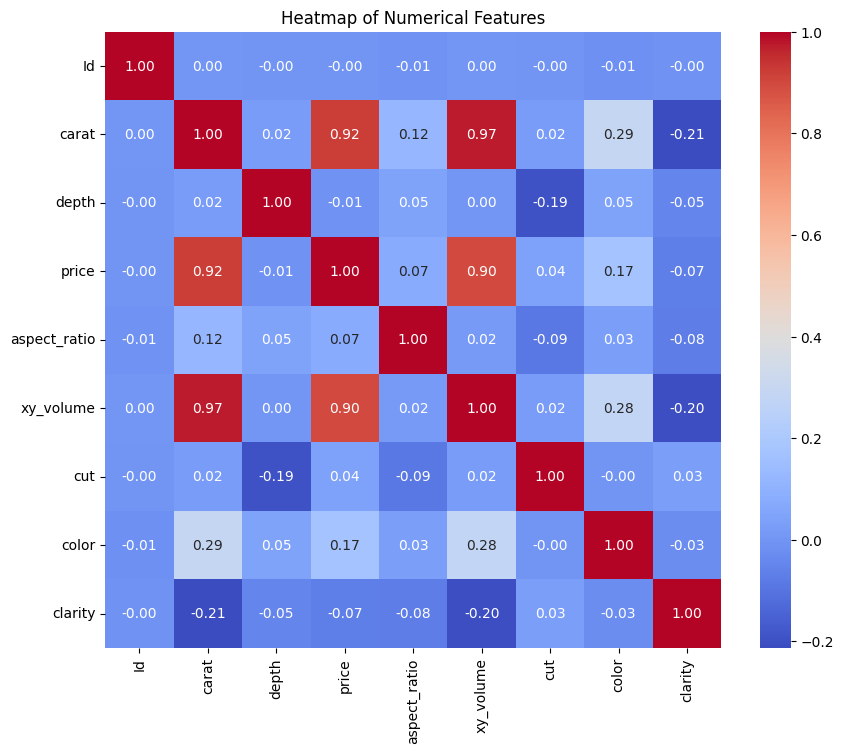

In [ ]:
corr = df_all_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

## drop id column

In [ ]:
df_all_features.drop('Id', axis=1,inplace=True)

## We will determine the features and the target of our data

In [ ]:
X = df_all_features.drop('price', axis=1)
y = df_all_features['price']

In [ ]:
X.head()

,carat,depth,aspect_ratio,xy_volume,cut,color,clarity
0,1.06,61.8,0.995455,176.483340,2,5,3
1,1.51,60.9,0.994609,246.965796,3,3,7
2,0.32,61.3,1.004535,52.943373,2,2,5
3,0.53,61.2,0.994253,86.422842,2,3,5
4,0.70,61.0,1.006993,115.315200,3,4,7


In [ ]:
X.isnull().sum()

carat           0
depth           0
aspect_ratio    0
xy_volume       0
cut             0
color           0
clarity         0
dtype: int64

In [ ]:
# X.fillna(X.mean(), inplace=True)

# # Alternatively, fill only specific columns
# X['carat'].fillna(X['aspect_ratio'].mean(), inplace=True)  # Fill only 'carat' column

In [ ]:
# X.isnull().sum()

In [ ]:
y.isnull().sum()

0

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43135 entries, 0 to 43151
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         43135 non-null  float64
 1   depth         43135 non-null  float64
 2   aspect_ratio  43135 non-null  float64
 3   xy_volume     43135 non-null  float64
 4   cut           43135 non-null  object 
 5   color         43135 non-null  object 
 6   clarity       43135 non-null  object 
dtypes: float64(4), object(3)
memory usage: 3.6+ MB


## split the data

In [ ]:
from sklearn.model_selection import train_test_split
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8627 entries, 26045 to 39453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         8627 non-null   float64
 1   depth         8627 non-null   float64
 2   aspect_ratio  8627 non-null   float64
 3   xy_volume     8627 non-null   float64
 4   cut           8627 non-null   object 
 5   color         8627 non-null   object 
 6   clarity       8627 non-null   object 
dtypes: float64(4), object(3)
memory usage: 539.2+ KB


## scale the x_train set

In [ ]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25, 75))
# # here we pass X_train as parameter
# d = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(d, columns=X_train.columns)
# X_train.head()

In [ ]:
# from sklearn import preprocessing
# from sklearn.preprocessing import MinMaxScaler
# # Using MinMaxScaler because there is outliers
# scaler = preprocessing.StandardScaler()
# # here we pass X_train as parameter
# d = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(d, columns=X_train.columns)
# X_train.head()

## scale the x_test set

In [ ]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25, 75))
# # here we pass X_train as parameter
# d = scaler.fit_transform(X_test)
# X_test = pd.DataFrame(d, columns=X_test.columns)
# X_test.head()

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn import preprocessing
# # Using MinMaxScaler
# scaler = preprocessing.StandardScaler()
# # here we pass X_test as parameter
# d = scaler.fit_transform(X_test)
# X_test = pd.DataFrame(d, columns=X_test.columns)
# X_test.head()

## Train models and we will start simple

# linear regression

In [ ]:
# Encode the categorical columns directly in your test data (df_test_all_features)
X_train["cut"] = label_encoder.fit_transform(X_train["cut"])
X_train["color"] = label_encoder.fit_transform(X_train["color"])
X_train["clarity"] = label_encoder.fit_transform(X_train["clarity"])
X_test["cut"] = label_encoder.fit_transform(X_test["cut"])
X_test["color"] = label_encoder.fit_transform(X_test["color"])
X_test["clarity"] = label_encoder.fit_transform(X_test["clarity"])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)
y_pred_test = lr_model.predict(X_test)
print('Score for training set:',lr_model.score(X_train, y_train))
print('Score for testing set:',lr_model.score(X_test, y_test))

print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Score for training set: 0.87900882994141
Score for testing set: 0.8712477244771069
Linear Regression
Mean Absolute Error: 933.4103730025472
Mean Squared Error: 2077726.7024384032
Root Mean Squared Error: 1441.4321705992284


# Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state = 40)
dt_regressor.fit(X_train,y_train)
y_dt_pred = dt_regressor.predict(X_test)

# score
accuracy_train=dt_regressor.score(X_train,y_train)
accuracy_test=dt_regressor.score(X_test,y_test)
print("Accuracy train of Decision Tree model is:",accuracy_train)
print("Accuracy test of Decision Tree model is:",accuracy_test)
print("Decision Tree")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_dt_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_dt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_dt_pred)))

Accuracy train of Decision Tree model is: 0.9999885626367725
Accuracy test of Decision Tree model is: 0.967354875458155
Decision Tree
Mean Absolute Error: 358.76952204319775
Mean Squared Error: 526807.3646819417
Root Mean Squared Error: 725.8149658707388


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
ans4 = knn.predict(X_test)
# score
accuracy_knn_train=knn.score(X_train,y_train)
accuracy_knn_test=knn.score(X_test,y_test)
print("Accuracy train of KNN model is:",accuracy_knn_train)
print("Accuracy test of KNN model is:",accuracy_knn_test)
print("KNN Model")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans4)))

Accuracy train of KNN model is: 0.9603312149446644
Accuracy test of KNN model is: 0.9477285988309543
KNN Model
Mean Absolute Error: 450.6920134461575
Mean Squared Error: 843524.4001841763
Root Mean Squared Error: 918.4358443485186


# Random Forest

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# Initialize a Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=42, oob_score=True)
# Train the regressor
rf_regressor.fit(X_train, y_train)
# Predict on the testing set
y_pred = rf_regressor.predict(X_test)

# Access the OOB Score
oob_score = rf_regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
# Calculate accuracy
accuracy_tr = rf_regressor.score(X_train, y_train)
accuracy_te = rf_regressor.score(X_test, y_test)
print(f"Accuracy of Random Forest on Our Training dataset: {accuracy_tr * 100:.2f}%")
print(f"Accuracy of Random Forest on Our Testing dataset: {accuracy_te * 100:.2f}%")
# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Out-of-Bag Score: 0.9779009207923923
Accuracy of Random Forest on Our Training dataset: 99.68%
Accuracy of Random Forest on Our Testing dataset: 98.12%
Mean Absolute Error: 271.4821740576374
Mean Squared Error: 302687.95442515466
Root Mean Squared Error: 550.1708411258767
R-squared: 0.981243075492137


# XGBoost

In [ ]:
# # Encode the categorical columns directly in your test data (df_test_all_features)
# X_train["cut"] = label_encoder.fit_transform(X_train["cut"])
# X_train["color"] = label_encoder.fit_transform(X_train["color"])
# X_train["clarity"] = label_encoder.fit_transform(X_train["clarity"])
# X_test["cut"] = label_encoder.fit_transform(X_test["cut"])
# X_test["color"] = label_encoder.fit_transform(X_test["color"])
# X_test["clarity"] = label_encoder.fit_transform(X_test["clarity"])

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train,verbose=False)
y_pred_xgb = xgb_model.predict(X_test)
# Calculate accuracy
accuracy_tr = xgb_model.score(X_train, y_train)
accuracy_te = xgb_model.score(X_test, y_test)
print(f"Accuracy of  xgboost on Our Training dataset: {accuracy_tr * 100:.2f}%")
print(f"Accuracy of xgboost on Our Testing dataset: {accuracy_te * 100:.2f}%")
# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))
mse = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

Accuracy of  xgboost on Our Training dataset: 99.12%
Accuracy of xgboost on Our Testing dataset: 98.12%
Mean Absolute Error: 275.71852592555814
Mean Squared Error: 302975.84547209373
Root Mean Squared Error: 550.4324168070897


#random search for best result

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 8],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5]
}

# Create the XGBoost model
xgb_model = XGBRegressor()

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=2)  # Adjust 'n_iter' and 'cv' as needed

# Fit the model on scaled training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print('Best Parameters:')
print(random_search.best_params_)

# Use the best model to make predictions on the test set
y_pred_xgb = random_search.best_estimator_.predict(X_test)

# ... rest of your evaluation code using y_pred_xgb
# Calculate accuracy on training and test sets (using the best model)
accuracy_tr = random_search.best_estimator_.score(X_train, y_train)
accuracy_te = random_search.best_estimator_.score(X_test, y_test)

print(f"Accuracy of xgboost on Our Training dataset: {accuracy_tr * 100:.2f}%")
print(f"Accuracy of xgboost on Our Testing dataset: {accuracy_te * 100:.2f}%")

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))
mse = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500; total time=   0.7s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500; total time=   0.7s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500; total time=   0.7s
[CV] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child

# Now we will apply the random Forest on test data or XGBOOST

In [ ]:
diamond_test_dataframe = pd.read_csv('/content/drive/MyDrive/Data_For_Analysis/test_diamond.csv')
df_test = diamond_test_dataframe.copy()
df_test.head(4)

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65


##drop outliers

In [ ]:
df_test = df_test.drop(df_test[df_test['x']==0].index)
df_test = df_test.drop(df_test[df_test['y']==0].index)
df_test = df_test.drop(df_test[df_test['z']==0].index)
df_test.shape

(10785, 10)

#we will take id column for storing values

In [ ]:
ID = df_test['Id']
ID

0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10785, dtype: int64

# Then we will remove it from df_test

In [ ]:
df_test.drop('Id',axis=1,inplace=True)

In [ ]:
df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


#numeric features

In [ ]:
df_test_numerical_features = df_test.select_dtypes(include='number')
df_test_numerical_features.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

#categorical features

In [ ]:
df_test_categorical_features = df_test.select_dtypes(include='object')
df_test_categorical_features.columns

Index(['cut', 'color', 'clarity'], dtype='object')

#label encoding

In [ ]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns.
for i in range(df_categorical_features.shape[1]):
  df_test_categorical_features.iloc[:,i] = label_encoder.fit_transform(df_test_categorical_features.iloc[:,i])

In [ ]:
df_test_categorical_features

,cut,color,clarity
0,2,3,7
1,3,1,5
2,4,5,4
3,3,1,3
4,2,3,6
...,...,...,...
10783,2,4,4
10784,2,3,5
10785,2,1,6
10786,3,1,3


# add the new features and delete the not necessay features

In [ ]:
# Calculate aspect ratio
df_test_numerical_features['aspect_ratio'] = df_test_numerical_features['x'] / df_test_numerical_features['y']
df_test_numerical_features['xy_volume'] = df_test_numerical_features['x'] * df_test_numerical_features['y'] * df_test_numerical_features['z']  # Area based on length and width
df_test_numerical_features

,carat,depth,table,x,y,z,aspect_ratio,xy_volume
0,0.34,61.1,57.0,4.52,4.48,2.75,1.008929,55.686400
1,0.71,62.7,58.0,5.74,5.68,3.58,1.010563,116.719456
2,0.44,62.8,56.0,4.83,4.88,3.05,0.989754,71.889720
3,0.81,60.1,59.0,6.09,6.03,3.65,1.009950,134.037855
4,0.40,61.2,56.0,4.74,4.80,2.92,0.987500,66.435840
...,...,...,...,...,...,...,...,...
10783,0.57,60.9,56.0,5.34,5.36,3.26,0.996269,93.309024
10784,1.05,60.8,57.0,6.65,6.58,4.02,1.010638,175.903140
10785,0.71,62.3,55.0,5.68,5.72,3.55,0.993007,115.338080
10786,1.11,61.0,60.0,6.68,6.66,4.07,1.003003,181.069416


In [ ]:
df_test_numerical_features.drop(['x','y','z','table'],axis=1,inplace=True)
df_test_numerical_features

,carat,depth,aspect_ratio,xy_volume
0,0.34,61.1,1.008929,55.686400
1,0.71,62.7,1.010563,116.719456
2,0.44,62.8,0.989754,71.889720
3,0.81,60.1,1.009950,134.037855
4,0.40,61.2,0.987500,66.435840
...,...,...,...,...
10783,0.57,60.9,0.996269,93.309024
10784,1.05,60.8,1.010638,175.903140
10785,0.71,62.3,0.993007,115.338080
10786,1.11,61.0,1.003003,181.069416


In [ ]:
# concatenating df_num_features and df_cat_features along columns
df_test_all_features = pd.concat([df_test_numerical_features, df_test_categorical_features], axis=1)
df_test_all_features.head()

,carat,depth,aspect_ratio,xy_volume,cut,color,clarity
0,0.34,61.1,1.008929,55.686400,2,3,7
1,0.71,62.7,1.010563,116.719456,3,1,5
2,0.44,62.8,0.989754,71.889720,4,5,4
3,0.81,60.1,1.009950,134.037855,3,1,3
4,0.40,61.2,0.987500,66.435840,2,3,6


# scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
# # Using MinMaxScaler
# scaler = preprocessing.StandardScaler()
# # here we pass X_test as parameter
# d = scaler.fit_transform(df_test_all_features)
# df_test_all_features = pd.DataFrame(d, columns=df_test_all_features.columns)
# df_test_all_features.head()

#check if there is missing values

In [ ]:
df_test_all_features.isna().sum()

carat           0
depth           0
aspect_ratio    0
xy_volume       0
cut             0
color           0
clarity         0
dtype: int64

In [ ]:
# df_test_all_features.fillna(X.mean(), inplace=True)

# Alternatively, fill only specific columns
# df_test_all_features['aspect_ratio'].fillna(df_test_all_features['aspect_ratio'].mean(), inplace=True)  # Fill only 'carat' column

In [ ]:
df_test_all_features.isna().sum()

carat           0
depth           0
aspect_ratio    0
xy_volume       0
cut             0
color           0
clarity         0
dtype: int64

In [ ]:
df_test_all_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10785 entries, 0 to 10787
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         10785 non-null  float64
 1   depth         10785 non-null  float64
 2   aspect_ratio  10785 non-null  float64
 3   xy_volume     10785 non-null  float64
 4   cut           10785 non-null  object 
 5   color         10785 non-null  object 
 6   clarity       10785 non-null  object 
dtypes: float64(4), object(3)
memory usage: 932.1+ KB


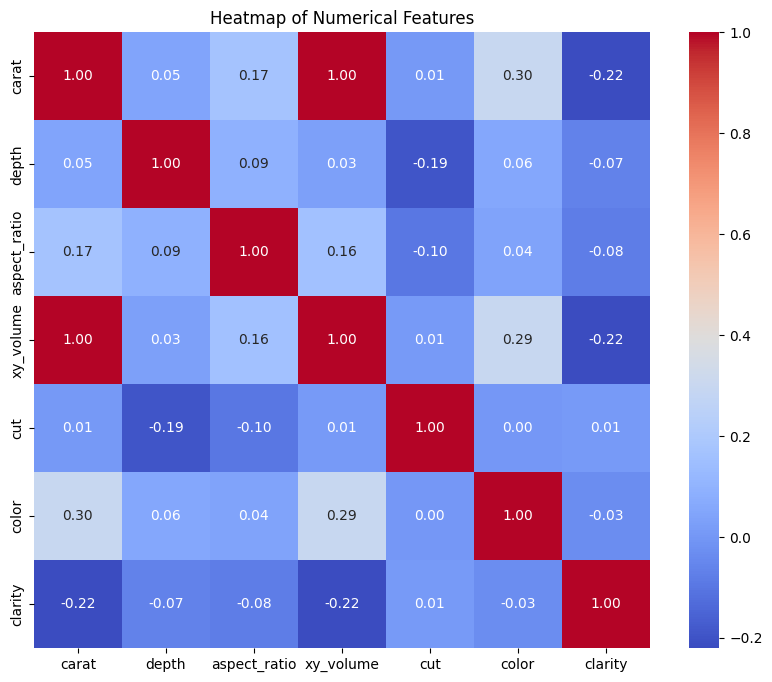

In [ ]:
corr = df_test_all_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

#predict price

In [ ]:
# price = rf_regressor.predict(df_test_all_features)
# price

In [ ]:
# Encode the categorical columns directly in your test data (df_test_all_features)
df_test_all_features["cut"] = label_encoder.fit_transform(df_test_all_features["cut"])
df_test_all_features["color"] = label_encoder.fit_transform(df_test_all_features["color"])
df_test_all_features["clarity"] = label_encoder.fit_transform(df_test_all_features["clarity"])

In [ ]:
df_test_all_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10785 entries, 0 to 10787
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         10785 non-null  float64
 1   depth         10785 non-null  float64
 2   aspect_ratio  10785 non-null  float64
 3   xy_volume     10785 non-null  float64
 4   cut           10785 non-null  int64  
 5   color         10785 non-null  int64  
 6   clarity       10785 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 932.1 KB


#predict price using random search cv for xgboost

In [ ]:
price = random_search.best_estimator_.predict(df_test_all_features)
price

array([  970.284 ,  2949.082 ,   828.6875, ...,  4189.974 ,  4794.252 ,
       14392.335 ], dtype=float32)

In [ ]:
data = {'ID':ID , 'price':price}
sub = pd.DataFrame(data)
# sub.to_csv('subxgone.csv',index=False)

In [ ]:
sub

,ID,price
0,1,970.283997
1,2,2949.082031
2,3,828.687500
3,4,2797.392090
4,5,1091.793213
...,...,...
10783,10784,1674.289307
10784,10785,6495.956055
10785,10786,4189.974121
10786,10787,4794.251953
